<a href="https://colab.research.google.com/github/anaazzahra/Minpro5_improving-employee-retention-by-predicting-employee-attrition-using-machine-learning/blob/main/Task_2_improving_employee_retention_by_predicting_employee_attrition_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Connecting to data source
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load data
df = pd.read_excel('/content/drive/MyDrive/Rakamin Academy/DS JAP/miniproject/minpro 5/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [4]:
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# **Task 1: Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## **Changing Data Type**

In [6]:
df['TanggalResign'] = df['TanggalResign'].replace('-', np.nan) #replace '-' with NaN

In [7]:
#Change 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign' to datetime

from datetime import datetime

date_col = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for col in date_col:
  df[col]=pd.to_datetime(df[col])

In [8]:
#Changing Value of 'PernahBekerja'
df['PernahBekerja'].unique()

array([1, 'yes'], dtype=object)

In [9]:
df['PernahBekerja'] = df['PernahBekerja'].replace({1: 'yes'}) #becausfe of 1 and 'yes' indicates similar meaning, so enough use value 'yes'

In [10]:
print(df['PernahBekerja'].unique())

['yes']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

## **Checking Unique Value Each Column**

In [13]:
unique_value_columns = df.nunique()
single_value_columns = unique_value_columns[unique_value_columns == 1].index.tolist()

In [14]:
print(f"Column with only one unique value: {single_value_columns}")

Column with only one unique value: ['PernahBekerja']


In [15]:
#Drop 'PernahBekerja'
df.drop(['PernahBekerja'], axis=1, inplace=True)

## **Checking Null and Duplicated Data**

In [16]:
#Missing Value
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                     

In [24]:
#Handling missing value
num = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
for column in num:
  median_value = df[column].median()
  df[column].fillna(median_value, inplace = True)

In [19]:
#Categorical Value
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

In [20]:
#deleting 'IkutProgramLOP' because lot of missing value
df.drop(['IkutProgramLOP'], axis=1, inplace=True)

In [23]:
#for column 'TanggalResign'
df['TanggalResign'].fillna(pd.NaT, inplace=True)

In [25]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
dtype: int64

In [26]:
#Duplicated data
df.duplicated().sum()

0

# **Task 2: Annual Report on Employee Number Changes**

## **Creating Table for Total Hiring and Resign**

In [28]:
#Extract date year
df['HiringYear'] = df['TanggalHiring'].dt.year
df['ResignYear'] = df['TanggalResign'].dt.year

In [29]:
#table employee based on year hiring and resign
hiring_table = df.groupby('HiringYear').size().reset_index(name='TotalHiring')
resign_table = df.groupby('ResignYear').size().reset_index(name='TotalResign')

In [32]:
#show calculate
print('Hiring Table:')
print(hiring_table)
print('Resign Table:')
print(resign_table)

Hiring Table:
    HiringYear  TotalHiring
0         2006            1
1         2007            2
2         2008            2
3         2009            7
4         2010            8
5         2011           76
6         2012           41
7         2013           43
8         2014           56
9         2015           31
10        2016           14
11        2017            5
12        2018            1
Resign Table:
   ResignYear  TotalResign
0      2013.0            5
1      2014.0           12
2      2015.0            8
3      2016.0            8
4      2017.0           19
5      2018.0           26
6      2019.0            5
7      2020.0            6


In [38]:
#Joining Table
table_merged = pd.merge(hiring_table, resign_table, left_on= 'HiringYear', right_on= 'ResignYear', how='outer' )

#replace NaN with 0
table_merged.fillna({'TotalHiring': 0, 'TotalResign': 0}, inplace=True)

#setting year
table_merged['HiringYear'] = table_merged['HiringYear'].fillna(table_merged['ResignYear'])

#setting table
table_merged = table_merged[['HiringYear', 'TotalHiring', 'TotalResign']]
table_merged.sort_values(by='HiringYear', inplace=True)
table_merged.rename(columns={'HiringYear': 'Year'}, inplace=True)

#deleting decimal 0
pd.options.display.float_format = '{:.0f}'.format
#
print(table_merged)

    Year  TotalHiring  TotalResign
0   2006            1            0
1   2007            2            0
2   2008            2            0
3   2009            7            0
4   2010            8            0
5   2011           76            0
6   2012           41            0
7   2013           43            5
8   2014           56           12
9   2015           31            8
10  2016           14            8
11  2017            5           19
12  2018            1           26
13  2019            0            5
14  2020            0            6


## **Agregration Total of Employee**

In [39]:
table_merged['Employee'] = table_merged['TotalHiring'].cumsum() - table_merged['TotalResign'].cumsum() #total real employee
table_merged['Change_Count'] = table_merged['TotalHiring'] - table_merged['TotalResign'] #change in total of employee

#
print(table_merged)

    Year  TotalHiring  TotalResign  Employee  Change_Count
0   2006            1            0         1             1
1   2007            2            0         3             2
2   2008            2            0         5             2
3   2009            7            0        12             7
4   2010            8            0        20             8
5   2011           76            0        96            76
6   2012           41            0       137            41
7   2013           43            5       175            38
8   2014           56           12       219            44
9   2015           31            8       242            23
10  2016           14            8       248             6
11  2017            5           19       234           -14
12  2018            1           26       209           -25
13  2019            0            5       204            -5
14  2020            0            6       198            -6


## **Visualization of Employee**

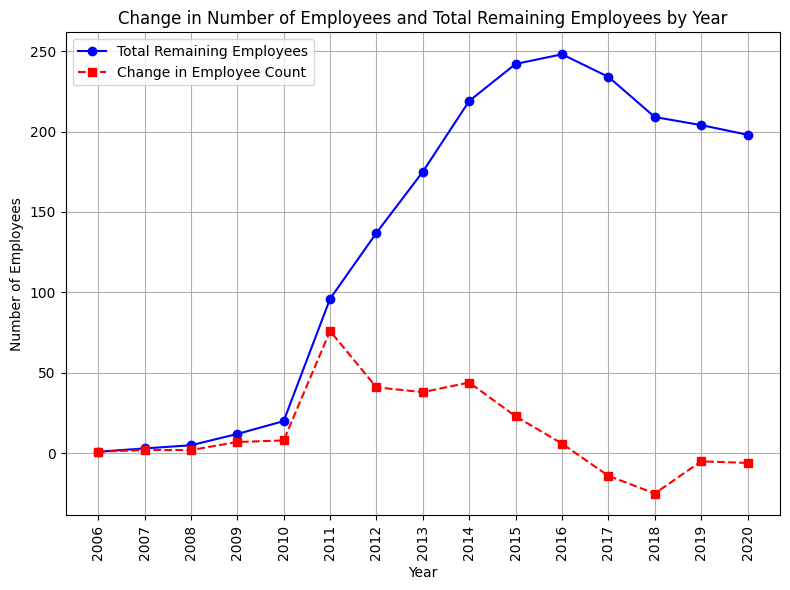

In [46]:
#Initiate Plot
plt.figure(figsize=(8,6)) #size of plot

#plot for employee
plt.plot(table_merged['Year'], table_merged['Employee'], marker='o', linestyle='-', color='b', label='Total Remaining Employees')

#plot for change number of employee
plt.plot(table_merged['Year'], table_merged['Change_Count'], marker='s', linestyle='--', color='r', label='Change in Employee Count')

# Labeling
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Change in Number of Employees and Total Remaining Employees by Year')
plt.legend()
plt.grid(True)
plt.xticks(table_merged['Year'], rotation=90)  # Rotate x-axis labels for better readability

# showing plot
plt.tight_layout()
plt.show()

Interpretation:

From 2010 to 2011, the total of employee increased significantly from 20 people up to 9 workers. Then, in the next several years until 2014, the number of employee rose up to 219. Fluctuations in changes in the number of employees indicate that the company experienced periods of growth and decline, with a peak in employee additions around 2011 and an increase in resignations in subsequent years. In addition, The highest number of employees occurred in 2016 up tp 248.